# Geo Visualisation

In [105]:
from pathlib import Path
import iris
import numpy as np
data_path = Path("data")

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [150]:
def set_bounds(cube):
    lon = cube.coords('longitude')[0]
    lat = cube.coords('latitude')[0]
    lon_bnds = lon.contiguous_bounds()
    lat_bnds = lat.contiguous_bounds()
    lon.bounds = np.c_[lon_bnds[:-1], lon_bnds[1:]]
    lat.bounds = np.c_[lat_bnds[:-1], lat_bnds[1:]]

In [151]:
sic_reynolds_v2 = iris.load_cube(str(data_path / "iceoi_v2.nc"))
set_bounds(sic_reynolds_v2)
iris.save(sic_reynolds_v2, "data/sic.nc")
# t2m = iris.load_cube(str(data_path / "erai_t2m.nc"))

/home/johannes/.local/opt/miniconda3/envs/climate/lib/python3.7/site-packages/iris/coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/johannes/.local/opt/miniconda3/envs/climate/lib/python3.7/site-packages/iris/coords.py:1140: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


In [152]:
cube = iris.load_cube("data/sic.nc") ; cube

<iris 'Cube' of Reynolds OI ice cover / (1) (time: 454; latitude: 180; longitude: 360)>

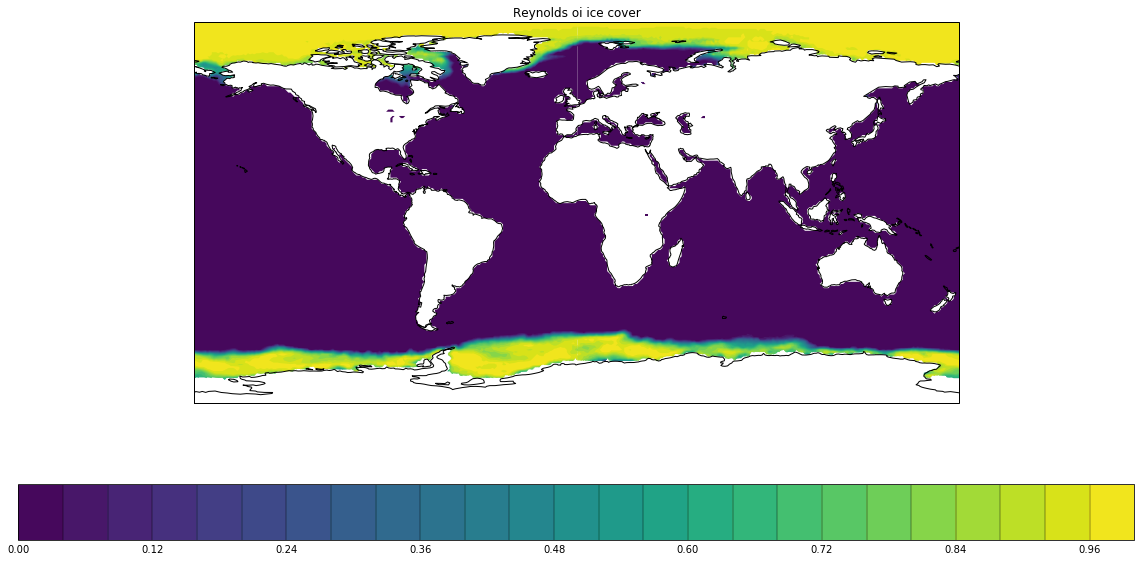

In [153]:
qplt.contourf(cube[0], 25)
plt.gca().coastlines()
plt.show()

# Using different projections

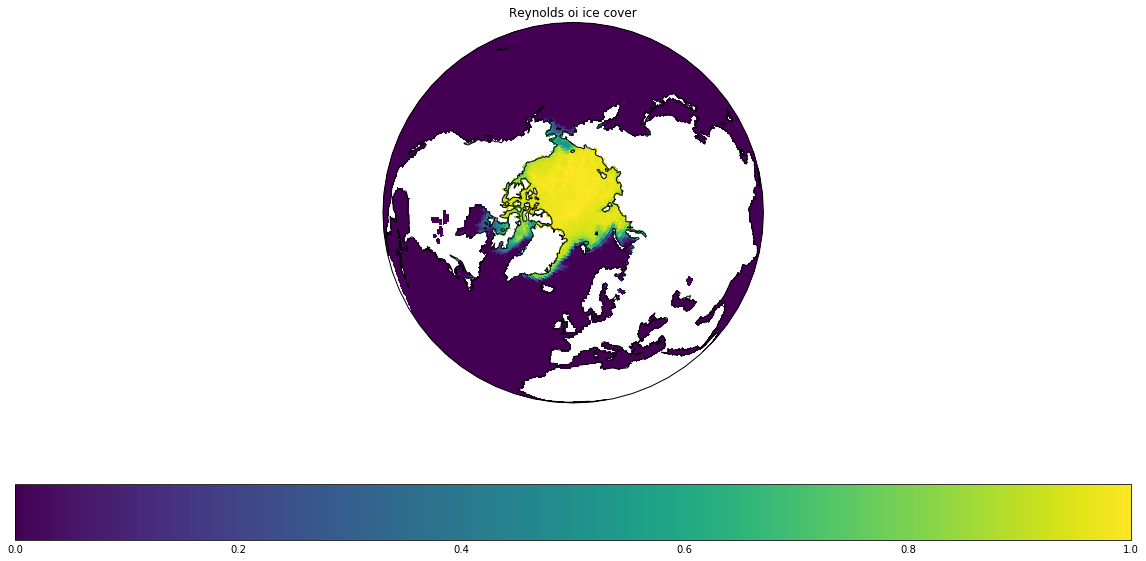

In [154]:
projection = ccrs.Orthographic(central_longitude=0, central_latitude=90)
ax = plt.subplot(projection=projection)
# ax.set_global()
# plot with Iris quickplot pcolormesh
qplt.pcolormesh(cube[0])
# Draw coastlines
ax.coastlines()